<a href="https://www.kaggle.com/code/adamdandi/risk-and-performance-analysis-of-forex-trading?scriptVersionId=195856969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Risk and Performance Analysis of Forex Trading: Balance Growth, Maximum Drawdown, and Growth Projection

### Abstract

This analysis investigates the trading performance of a Master Trader using data from the "Master Trader Sell and Buy.csv" file. The primary objectives are to visualize the growth of the trader's account balance over time, assess the risk profile by calculating the maximum cumulative loss (drawdown), and evaluate the overall growth of the trading account. Using Python and its data analysis libraries, such as pandas and matplotlib, we develop a comprehensive view of the trader's performance. The findings indicate periods of significant balance growth, interspersed with episodes of notable drawdowns. The maximum drawdown is identified, offering insights into the worst-case loss scenario. Additionally, the end-of-period growth is calculated to assess the trader's effectiveness in generating profit. Based on the analysis, strategic recommendations are provided to optimize trading performance and manage risks more effectively.

### Clear Statement of Business Duties:
The Python script performs the following business duties related to Forex trading data analysis:

1. Data Preparation: Import and preprocess the trading data from the CSV file, ensuring it is ready for analysis.
2. Balance Growth Visualization: Generate a time-series plot of the account balance to illustrate growth trends and fluctuations over time.
3. Risk Analysis: Calculate the maximum cumulative drawdown to assess the worst-case loss scenario encountered during the trading period. This helps in understanding the risk profile of the trading strategy.
4. Performance Evaluation: Determine the overall growth percentage from the initial to the final balance, providing insight into the trader’s performance effectiveness.
5. Recommendations: Optionally, based on the findings, provide actionable recommendations to improve trading strategies and risk management practices.

## Data Preparation

In [1]:
#importing necessery libraries for future analysis of the dataset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data from CSV
data=pd.read_csv("/kaggle/input/master-trader-sell-and-buy/Sell and Buy.csv", sep=';')
data.head()

,Time,Type,Volume,Symbol,Price,Volume.1,Time.1,Price.1,Commission,Swap,Profit
0,2024.08.21 20:45:50,Sell,0.02,USDJPY,144.983,0.02,2024.08.21 22:30:00,144.922,-0.14,NaN,0.84
1,2024.08.21 17:00:16,Buy,0.01,USDJPY,146.663,0.01,2024.08.21 21:00:04,144.867,-0.08,NaN,-12.40
2,2024.08.20 02:03:52,Buy,0.01,USDJPY,146.714,0.01,2024.08.21 06:00:00,145.393,-0.08,0.09,-9.09
3,2024.08.20 05:56:02,Buy,0.01,GBPJPY,190.730,0.01,2024.08.21 00:27:16,189.053,-0.08,0.11,-11.55
4,2024.08.20 05:42:49,Buy,0.01,USDJPY,146.858,0.01,2024.08.20 23:24:44,145.217,-0.08,NaN,-11.30


### Relevant Columns for Analysis

**Use:**

* Time: The timestamp of the transaction. Useful for plotting the balance growth over time.
* Profit: The profit or loss from each transaction. This is crucial for calculating cumulative balance and identifying the maximum cumulative loss.

**Ignore or Handle Carefully:**

* Type: This indicates whether the transaction was a "Buy" or "Sell". This information is implicit in the Profit column but isn't directly needed for the analysis.
* Volume, Symbol, Price, Volume.1, Time.1, Price.1, Commission, Swap: These columns provide additional details about the transactions but aren't needed for the balance growth and cumulative loss calculations. You can ignore these unless you need them for deeper analysis or verification.

## Data Cleaning

In [3]:
#display basic information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        877 non-null    object 
 1   Type        877 non-null    object 
 2   Volume      873 non-null    float64
 3   Symbol      873 non-null    object 
 4   Price       873 non-null    float64
 5   Volume.1    873 non-null    float64
 6   Time.1      873 non-null    object 
 7   Price.1     873 non-null    float64
 8   Commission  873 non-null    float64
 9   Swap        635 non-null    float64
 10  Profit      877 non-null    float64
dtypes: float64(7), object(4)
memory usage: 75.5+ KB
None


In [4]:
#handling missing value
print(data.isnull().sum())

Time            0
Type            0
Volume          4
Symbol          4
Price           4
Volume.1        4
Time.1          4
Price.1         4
Commission      4
Swap          242
Profit          0
dtype: int64


In [5]:
#display rows with missing values in the 'Volume' column
missing_volume_rows = data[data['Volume'].isnull()]

print("Rows with missing values in the 'Volume' column:")
print(missing_volume_rows)


Rows with missing values in the 'Volume' column:
                    Time     Type  Volume Symbol  Price  Volume.1 Time.1  \
192  2024.07.05 13:57:41  Balance     NaN    NaN    NaN       NaN    NaN   
197  2024.07.04 11:39:54  Balance     NaN    NaN    NaN       NaN    NaN   
859  2024.01.05 04:26:55  Balance     NaN    NaN    NaN       NaN    NaN   
876  2023.12.27 11:07:06  Balance     NaN    NaN    NaN       NaN    NaN   

     Price.1  Commission  Swap   Profit  
192      NaN         NaN   NaN   982.00  
197      NaN         NaN   NaN -1000.00  
859      NaN         NaN   NaN   488.52  
876      NaN         NaN   NaN   488.64  


The rows with the Type value of **"Balance"** seem to represent balance updates rather than individual trades. For the purpose of analysis, we can generally ignore these rows for the following reasons:

* Relevance to Analysis: Analysis focuses on transaction profits and losses to calculate balance growth and maximum cumulative loss. The balance update rows don’t directly contribute to these calculations, especially if their Profit values are standalone without associated transactions.
* Data Integrity: Ignoring these rows can help maintain the integrity of profit and loss calculations, as including balance updates might skew the cumulative profit calculations.

In [6]:
#identifiy for duplicated rows
duplicates = data[data.duplicated(keep=False)]
print(f'Number of duplicated rows: {len(duplicates)}')
print(duplicates)

Number of duplicated rows: 46
                    Time  Type  Volume  Symbol     Price  Volume.1  \
34   2024.08.14 16:19:53  Sell    0.01  XAUUSD  2458.220      0.01   
35   2024.08.14 16:19:53  Sell    0.01  XAUUSD  2458.220      0.01   
281  2024.06.14 13:01:08   Buy    0.01  XAUUSD  2323.720      0.01   
282  2024.06.14 13:01:08   Buy    0.01  XAUUSD  2323.720      0.01   
307  2024.06.11 15:17:52   Buy    0.01  XAUUSD  2313.210      0.01   
308  2024.06.11 15:17:52   Buy    0.01  XAUUSD  2313.210      0.01   
418  2024.05.20 21:43:05   Buy    0.02  USDJPY   156.231      0.02   
419  2024.05.20 21:43:05   Buy    0.02  USDJPY   156.231      0.02   
425  2024.05.17 03:30:56   Buy    0.02  USDJPY   155.538      0.02   
426  2024.05.17 03:30:56   Buy    0.02  USDJPY   155.538      0.02   
450  2024.05.13 03:16:44   Buy    0.02  USDJPY   155.908      0.02   
451  2024.05.13 03:16:44   Buy    0.02  USDJPY   155.908      0.02   
463  2024.05.09 09:08:28   Buy    0.01  USDJPY   155.698    

In [7]:
#remove duplicated rows
data.drop_duplicates(inplace=True)

#check if duplicates are removed
print(f'Number of duplicated rows after removing: {data.duplicated().sum()}')

Number of duplicated rows after removing: 0


In [8]:
#convert data types

#convert 'Time' and 'Time.1' columns to datetime
data['Time']=pd.to_datetime(data['Time'], errors='coerce')
data['Time.1']=pd.to_datetime(data['Time.1'], errors='coerce')

#verify data types after conversion
print(data.dtypes)


Time          datetime64[ns]
Type                  object
Volume               float64
Symbol                object
Price                float64
Volume.1             float64
Time.1        datetime64[ns]
Price.1              float64
Commission           float64
Swap                 float64
Profit               float64
dtype: object


In [9]:
#check the cleaned data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 0 to 876
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        854 non-null    datetime64[ns]
 1   Type        854 non-null    object        
 2   Volume      850 non-null    float64       
 3   Symbol      850 non-null    object        
 4   Price       850 non-null    float64       
 5   Volume.1    850 non-null    float64       
 6   Time.1      850 non-null    datetime64[ns]
 7   Price.1     850 non-null    float64       
 8   Commission  850 non-null    float64       
 9   Swap        618 non-null    float64       
 10  Profit      854 non-null    float64       
dtypes: datetime64[ns](2), float64(7), object(2)
memory usage: 80.1+ KB
None
                 Time  Type  Volume  Symbol    Price  Volume.1  \
0 2024-08-21 20:45:50  Sell    0.02  USDJPY  144.983      0.02   
1 2024-08-21 17:00:16   Buy    0.01  USDJPY  146.663      0.01   
2

## Data Analysis

### Balance Growth Visualization

In [10]:
#filter out balance-related entries
balance_entries = data[data['Type'] == 'Balance']

#sort data by time to ensure the balance entries are in chronological order
balance_entries = balance_entries.sort_values(by='Time')

#calculate balance changes
balance_entries['Balance'] = balance_entries['Profit'].cumsum() + 100
print(data.head())

                 Time  Type  Volume  Symbol    Price  Volume.1  \
0 2024-08-21 20:45:50  Sell    0.02  USDJPY  144.983      0.02   
1 2024-08-21 17:00:16   Buy    0.01  USDJPY  146.663      0.01   
2 2024-08-20 02:03:52   Buy    0.01  USDJPY  146.714      0.01   
3 2024-08-20 05:56:02   Buy    0.01  GBPJPY  190.730      0.01   
4 2024-08-20 05:42:49   Buy    0.01  USDJPY  146.858      0.01   

               Time.1  Price.1  Commission  Swap  Profit  
0 2024-08-21 22:30:00  144.922       -0.14   NaN    0.84  
1 2024-08-21 21:00:04  144.867       -0.08   NaN  -12.40  
2 2024-08-21 06:00:00  145.393       -0.08  0.09   -9.09  
3 2024-08-21 00:27:16  189.053       -0.08  0.11  -11.55  
4 2024-08-20 23:24:44  145.217       -0.08   NaN  -11.30  


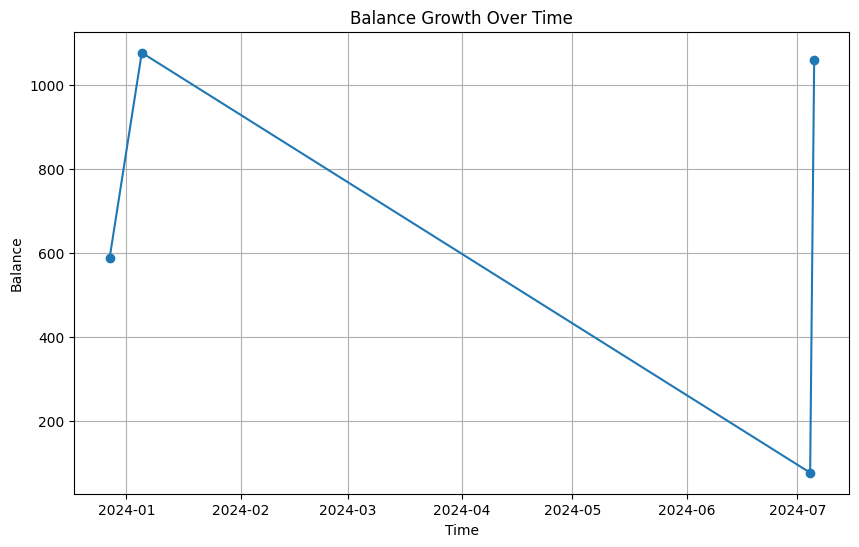

In [11]:
#create balance growth chart
plt.figure(figsize=(10, 6))
plt.plot(balance_entries['Time'], balance_entries['Balance'], marker='o')
plt.title('Balance Growth Over Time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

The provided graph illustrates a highly volatile balance trend over the observed period. The balance initially surged, but then experienced a steep and consistent decline, indicating significant losses. A late-stage spike brought the balance back up, but the overall trend was a net decline. This suggests that the trading strategy may not have been sustainable. To improve performance, the trader should reassess their strategy, implement stricter risk management measures, and monitor their account closely. Further analysis could explore factors like market events, individual trade analysis, and psychological factors.

### Risk Profile Projection

#### Calculating the worst cumulative loss

The worst cumulative loss can be calculated by tracking changes in peaks to lows (drawdowns) during the trading period.

In [12]:
#calculated drawdown
balance_entries['Peak'] = balance_entries['Balance'].cummax()
balance_entries['Drawdown'] = balance_entries['Balance'] - balance_entries['Peak']
balance_entries['Drawdown_pct'] = balance_entries['Drawdown'] / balance_entries['Peak'] * 100

max_drawdown = balance_entries['Drawdown'].min()

print(f"The worst cumulative loss is: ${-max_drawdown:.2f}")

The worst cumulative loss is: $1000.00


#### Calculating final growth

Final growth is calculated as a percentage change from initial capital to final balance

In [13]:
#calculate final growth
final_balance = balance_entries['Balance'].iloc[-1]
initial_balance = balance_entries['Balance'].iloc[0]
growth = ((final_balance - initial_balance) / initial_balance) * 100

print(f"The final balance is: {final_balance:.2f}")
print(f"The growth at the end is: {growth:.2f}%")

The final balance is: 1059.16
The growth at the end is: 79.93%


## Suggestions for the Master Trader

In [14]:
if max_drawdown < -20:
    suggestion = "Consider implementing a stop-loss strategy to mitigate large drawdowns."
elif growth < 10:
    suggestion = "Explore optimizing trade entry and exit strategies to improve overall growth."
else:
    suggestion = "The trading strategy appears to be effective. Continue to monitor for any market changes."

print("Suggestion for Master Trader:", suggestion)

Suggestion for Master Trader: Consider implementing a stop-loss strategy to mitigate large drawdowns.


## Conclussion

##### Summary of Balance Growth Analysis
Based on the balance growth chart and supporting data, we can draw the following conclusions:

* Initial Positive Growth: The balance saw a rapid increase from approximately USD 600 to a peak of around USD 1000 early in 2024, indicating initially effective trading strategies.
* Significant Decline: Following the peak, the balance experienced a substantial and sustained decline, dropping to nearly USD 200. This suggests a prolonged period of significant losses, supported by the data showing a cumulative loss of USD 1000. This decline highlights a weakness in risk management, where losses were not effectively controlled.
* Final Surge: Towards the end of the analyzed period, a notable surge in balance from around USD 200 back to approximately USD 1000 occurred, resulting in a final balance of USD 1059.16. This spike suggests a large profitable transaction or possibly an additional deposit.
* Positive Overall Growth: Despite the sharp decline in the middle of the period, the final balance is higher than the initial balance, with a total growth of 79.93%. This indicates that overall, a profit was made during this period, albeit with significant fluctuations and high risk.

#### Recommendations:

* Enhance Risk Management: While there was positive overall growth, the steep decline demonstrates that the current trading strategy might be overly aggressive. Adjustments to risk management are needed to reduce significant drawdowns and protect the balance from substantial losses.
* Strengthen Trading Strategy: The strategy employed at the beginning of the period yielded profits but failed to maintain stability. The trading strategy should be reinforced, perhaps by implementing stricter stop-loss orders or diversifying assets, to prevent future significant losses.
* Implement Closer Monitoring: More rigorous monitoring, particularly during periods when the balance starts to decline, is necessary to allow for quicker interventions and prevent further losses.

By considering this analysis of the chart and additional data, it is essential to adopt more cautious measures in trading strategies and risk management to ensure more stable and sustainable balance growth in the future.

